In [161]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from scipy import optimize
import math
import numpy as np

In [405]:
def draw_rtn_spring(ax, centre_pivot, free_len):
    
    x = math.sqrt(centre_pivot[0]**2 + centre_pivot[1]**2) - free_len
    angle = 0
    if(centre_pivot[1] != 0):
        if(centre_pivot[1] > 0):
            angle = 90 - math.degrees(math.atan(centre_pivot[0]/centre_pivot[1]))
        else:
            angle = math.degrees(math.atan(-centre_pivot[0]/centre_pivot[1])) - 90
            
    line1_x = [0, free_len / 4 * math.cos(math.radians(angle))]
    line1_y = [0, free_len / 4 * math.sin(math.radians(angle))]
    ax.plot(line1_x, line1_y, color = "black")
    ax.scatter(line1_x, line1_y, [plt.rcParams['lines.markersize'] ** 2, 0], color = "black")
    
    rect_bottom_left = (line1_x[1] + 20*math.sin(math.radians(angle)),line1_y[1] - 20*math.cos(math.radians(angle)))
    box = plt.Rectangle(rect_bottom_left, free_len/2 + x, 40, angle)
    ax.add_patch(box)
    
    line2_x = [line1_x[1]*(3 + x/(free_len/4)), line1_x[1]*(4 + x/(free_len/4))]
    line2_y = [line1_y[1]*(3 + x/(free_len/4)), line1_y[1]*(4 + x/(free_len/4))]
    ax.plot(line2_x, line2_y, color = "black")
    ax.scatter(line2_x, line2_y, [0, plt.rcParams['lines.markersize'] ** 2], marker = 'o', color = "black")

    
    for i in range(0,4):
        
        x0 = rect_bottom_left[0] + math.cos(math.radians(angle))*i*(free_len + 2*x)/8
        y0 = rect_bottom_left[1] + math.sin(math.radians(angle))*i*(free_len + 2*x)/8
        x1 = rect_bottom_left[0] + math.cos(math.radians(angle))*(i+1)*(free_len + 2*x)/8
        y1 = rect_bottom_left[1] + math.sin(math.radians(angle))*(i+1)*(free_len + 2*x)/8
        
        th = math.atan((free_len + 2*x)/8/40)
        h = math.sqrt(40**2 + ((free_len + 2*x)/8)**2)
        
        zig_x = [x0, x0 - math.sin(math.radians(angle) - th)*h]
        zig_y = [y0, y0 + math.cos(math.radians(angle) - th)*h]
        ax.plot(zig_x, zig_y, color = 'black') 
        
        if(i == 0):
            zag_x = [x0 - math.cos(math.radians(90 - angle))*40, x0]
            zag_y = [y0 + math.sin(math.radians(90 - angle))*40, y0]
            ax.plot(zag_x, zag_y, color = 'black')

        zag_x = [x0 - math.sin(math.radians(angle) - th)*h, x1]
        zag_y = [y0 + math.cos(math.radians(angle) - th)*h, y1]
        ax.plot(zag_x, zag_y, color = 'black') 
    
def draw_cylinder(ax, centre_pivot, min_len):
    
    x = math.sqrt((390 - centre_pivot[0])**2 + (140 - centre_pivot[1])**2) - min_len
    angle = 0
    if(centre_pivot[1] != 140):
        angle = 90 - math.degrees(math.atan((390 - centre_pivot[0])/(140 - centre_pivot[1])))
    
    line1_x = [390, 390 - min_len / 6 * math.cos(math.radians(angle))]
    line1_y = [140, 140 - min_len / 6 * math.sin(math.radians(angle))]
    ax.scatter(line1_x, line1_y, [plt.rcParams['lines.markersize'] ** 2, 0], marker = 'o', color = "tab:blue")
    ax.plot(line1_x, line1_y, color = "tab:blue")
    
    h = math.sqrt(30**2 + (min_len*2/3)**2)
    a = math.asin(min_len*2/3/h) - math.radians(angle)
    rect_bottom_left = (line1_x[1] - h*math.sin(a), line1_y[1] - h*math.cos(a))
    box = plt.Rectangle(rect_bottom_left, min_len*2/3, 60, angle)
    ax.add_patch(box)
    
    
    line2_x = [line1_x[1]*(1 + x/(min_len/6)) - (x/(min_len/6))*line1_x[0], line1_x[1]*(6 + x/(min_len/6)) - (5 + x/(min_len/6))*line1_x[0]]
    line2_y = [line1_y[1]*(1 + x/(min_len/6)) - (x/(min_len/6))*line1_y[0], line1_y[1]*(6 + x/(min_len/6)) - (5 + x/(min_len/6))*line1_y[0]]
    ax.scatter(line2_x, line2_y, [0, plt.rcParams['lines.markersize'] ** 2], marker = 'o', color = "red")
    ax.plot(line2_x, line2_y, color = "red", linewidth = 5)
    
    line3_x = [line2_x[0] - 25*math.sin(math.radians(angle)), line2_x[0] + 25*math.sin(math.radians(angle))]
    line3_y = [line2_y[0] + 25*math.cos(math.radians(angle)), line2_y[0] - 25*math.cos(math.radians(angle))]
    ax.plot(line3_x, line3_y, color = "red", linewidth = 5)

def draw_linkage(ax, start, end):
    
    angle = math.atan((end[1] - start[1])/(end[0] - start[0]))
    h = math.sqrt((start[1] - end[1])**2 + (start[0] - end[0])**2)
    
    rect_bottom_left = (start[0] + 10*math.sin(angle), start[1] - 10*math.cos(angle))
    box = plt.Rectangle(rect_bottom_left, h, 20, math.degrees(angle))
    ax.add_patch(box)    
    
    ax.scatter([start[0], end[0]], [start[1], end[1]], marker = 'o', color = 'blue')

def draw_pedal(ax, travel):
    
    angle = 90 + math.degrees(math.atan(travel / 210))
    
    rect_bottom_left = (390 + 20*math.cos(math.radians(angle - 90)), -200 + 20*math.sin(math.radians(angle - 90)))
    box = plt.Rectangle(rect_bottom_left, 220, 40, angle)
    coll = PatchCollection([box], zorder = 0, facecolor = "grey")
    ax.add_collection(coll)    
    
    a = angle - math.degrees(math.atan(190/130))
    h = math.sqrt(130**2 + 190**2)
    
    rect_bottom_left = (rect_bottom_left[0] - h*math.sin(math.radians(a)), rect_bottom_left[1] + h*math.cos(math.radians(a)))
    box = plt.Rectangle(rect_bottom_left, 90, 30, angle - 90)
    coll = PatchCollection([box], zorder = 0, facecolor = "grey")
    ax.add_collection(coll)   
    
    a = 180 - angle - math.degrees(math.atan(15/10))
    h = math.sqrt(15**2 + 100)
    a2 = 180 - angle - math.degrees(math.atan(15/90))
    h2 = math.sqrt(90**2 + 15**2)
    slot_x = (rect_bottom_left[0] + h*math.sin(math.radians(a)), rect_bottom_left[0] + h2*math.sin(math.radians(a2)))
    slot_y = (rect_bottom_left[1] + h*math.cos(math.radians(a)), rect_bottom_left[1] + h2*math.cos(math.radians(a2)))
    ax.plot(slot_x, slot_y, linewidth = 5, color = 'white', zorder = 0)
    
    ax.scatter([390], [-200], marker = 'o', color = 'blue')

In [412]:
def calc_linkage(start, length):
    # Find the linkage end point and pedal position.
    
    # Pedal initially upright (no travel).
    angle = 0
    
    while(True):

        slot_start = (390 - 205*math.sin(math.radians(angle)) - 100*math.cos(math.radians(angle)), -200 + 205*math.cos(math.radians(angle)) - 100*math.sin(math.radians(angle)))
        slot_end = (390 - 205*math.sin(math.radians(angle)) - 20*math.cos(math.radians(angle)), -200 + 205*math.cos(math.radians(angle)) - 20*math.sin(math.radians(angle)))

        # Calculate line of slot.
        slot_slope = (slot_end[1] - slot_start[1])/(slot_end[0] - slot_start[0])
        slot_intercept = slot_end[1] - slot_slope*slot_end[0]

        # Solve the equation of the linkage's arc with the line of the brake slot.
        def arc(th):
            return start[1] - length*math.sin(th) - slot_intercept - slot_slope*(start[0] + length*math.cos(th))
        th = optimize.newton(arc, math.radians(10))
        end = (start[0] + length*math.cos(th), start[1] - length*math.sin(th))

        # Rotate the pedal forward if no solution within the slot.
        if(end[0] < slot_start[0]):
            angle = angle + 0.1
        else:
            break
        
    return end, angle, th


def calc_force(pivot):
    
    # Brake linkage end point, pedal angle (CCW from vert), linkage angle (down from horiz).
    global link_len
    link_end, angle, th = calc_linkage(pivot, link_len)

    # Straight-line brake pedal travel.
    travel = 210*math.tan(math.radians(angle))

    # Angle from pedal pivot to end of slot.
    pivot_angle = 180 - math.degrees(math.atan(205/100))      
    # Empirical fit.
    brake_force = (travel > 0)*0.685*math.exp(0.653*travel/10)*9.8
    # Sine law (triangle of linkage force, pedal force and pedal pivot reaction).
    link_tension = math.sin(math.radians(pivot_angle))*brake_force / math.sin(math.radians(180 - angle - th - pivot_angle))

    link_tension_x = link_tension*math.cos(th)
    link_tension_y = -link_tension*math.sin(th)

    # Hooke's Law
    global k, l0
    l1 = math.sqrt(pivot[0]**2 + pivot[1]**2)
    spring_force = -k*(l1 - l0)
    
    spring_force_x = spring_force*pivot[0]/l1
    spring_force_y = spring_force*pivot[1]/l1

    # Cylinder Pulling Force
    global cyl_force
    
    cyl_len = math.sqrt((390 - pivot[0])**2 + (140 - pivot[1])**2)
    
    cyl_force_x = cyl_force*(390 - pivot[0])/cyl_len
    cyl_force_y = cyl_force*(140 - pivot[1])/cyl_len

    pivot_f_sum = (spring_force_x + link_tension_x + cyl_force_x, spring_force_y + link_tension_y + cyl_force_y)

#    print(pivot, angle, link_tension_x, link_tension_y, spring_force_x, spring_force_y, cyl_force_x, cyl_force_y)
#    print(pivot, pivot_f_sum)
    
    return link_end, travel, pivot_f_sum, (l1 - l0), cyl_len        


In [413]:
def find_centre_pivot(initial):

    def opt_force(centre_pivot):
    #    print(centre_pivot)
        end, travel, f_sum, spring_ext, cyl_len = calc_force(centre_pivot)
        return math.sqrt(f_sum[0]**2 + f_sum[1]**2)

    f_sum_opt = optimize.minimize(opt_force, initial) #method = 'SLSQP', bounds = ((120, 180),(-20,70)))
    centre_pivot = f_sum_opt.x
    print(f_sum_opt)

    return centre_pivot

In [414]:
def simulate():
    global initial_centre_pivot
    centre_pivot = find_centre_pivot(initial_centre_pivot)

    initial_centre_pivot = centre_pivot
    
    end, travel, f_sum, spring_ext, cyl_len = calc_force(centre_pivot)
    print("\nPivot Location: ", centre_pivot, 
          "\nBrake Travel: ", travel, 
          "\nSpring Extension: ", spring_ext,
          "\nCylinder Total Length: ", cyl_len,
          "\nForce Sum: ", f_sum)


    #opt_force(centre_pivot)

    ax.clear()
    
    global l0, cyl_min_len
    draw_rtn_spring(ax, centre_pivot, l0)
    draw_cylinder(ax, centre_pivot, cyl_min_len)
    draw_linkage(ax, centre_pivot, end)
    draw_pedal(ax, travel)

    #print(travel, brake_force, link_tension)

    ax.set_ylim([-250,200])
    ax.set_xlim([0,500])
    ax.set_aspect(aspect=1)

<IPython.core.display.Javascript object>


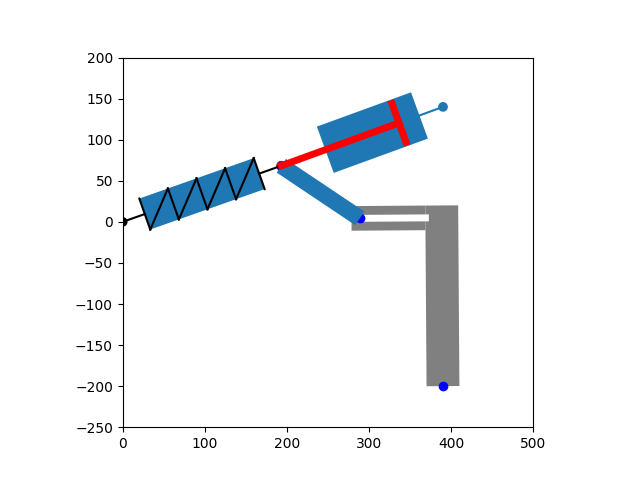

      fun: 5.901730163091782e-08
 hess_inv: array([[ 1.94365492e-09, -7.81805076e-10],
       [-7.81805076e-10,  2.61610908e-09]])
      jac: array([0.66989136, 0.51626779])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 464
      nit: 24
     njev: 113
   status: 2
  success: False
        x: array([193.1377926,  68.2881241])

Pivot Location:  [193.1377926  68.2881241] 
Brake Travel:  1.4661003904042607 
Spring Extension:  90.5547651994669 
Cylinder Total Length:  209.51687723433602 
Force Sum:  (4.39810037278221e-08, 3.935369363716745e-08)


In [528]:
# Spring (2x Century Spring 81122)
k = 2*3.503
l0 = 114.3
# Cylinder
cyl_force = 630
cyl_min_len = 183
# Linkage
link_len = 115

# Use the solution space search below if you can't guess an initial centre point.
initial_centre_pivot = (190,68)
#initial_centre_pivot = (120,-10)

fig, ax = plt.subplots()

simulate()
plt.show()

def animate(i):
    global cyl_force
    cyl_force = i*10
    simulate()
    plt.title("Cylinder Force: " + str(cyl_force) + "N")

#for i in range(0,55):
#    animate(i)
#    plt.show()
#    plt.savefig("{:03d}".format(i) + ".png")

In [236]:
! convert -delay 10 -loop 0 *.png anim.gif

In [498]:
### Grid search to find solution region for optimisation. Units are 2*mm.

sol_space = np.empty((75,75))

for x in range(100,250,2):
    print(x)
    for y in range(-50, 100,2):
        try:
            end, travel, f_sum, spring, cyl = calc_force((x, y))
            sol_space[x//2 - 50, y//2 + 25] = math.sqrt(f_sum[0]**2 + f_sum[1]**2)
        except:
            # No solution for linkage
            sol_space[x//2 - 50, y//2 + 25] = 99

100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248


In [499]:
# Point with minimum force sum.
min_pt = np.unravel_index(np.argmin(sol_space), sol_space.shape)
print((min_pt[0]+50)*2,(min_pt[1]-25)*2)

202 68


<IPython.core.display.Javascript object>


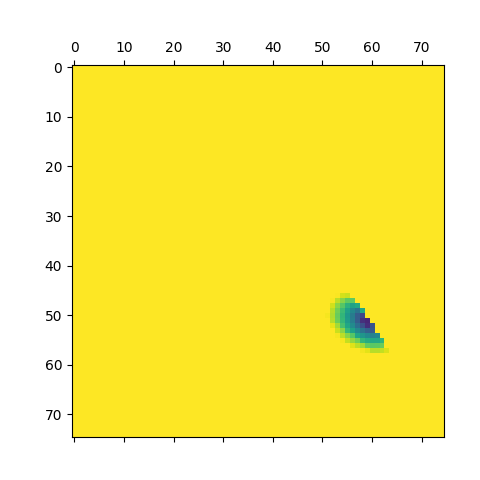

In [500]:
norm = cm.colors.Normalize(vmax=99, vmin=0)
plt.matshow(sol_space, norm=norm)

<IPython.core.display.Javascript object>


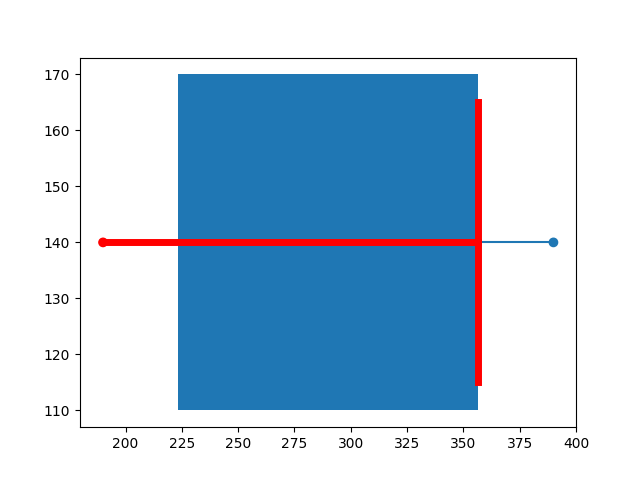

In [401]:
fig, ax = plt.subplots()
draw_cylinder(ax, (190, 140), 200)
plt.show()